<a href="https://colab.research.google.com/github/novrian6/review_time_series/blob/main/Review_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf  # Yahoo Finance API
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Download stock market data from Yahoo Finance for Apple (AAPL) from 2010 to 2020
data = yf.download('AAPL', start='2010-01-01', end='2020-01-01', progress=False)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.487534,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.498750,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.395379,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.383557,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.425994,447610800
...,...,...,...,...,...,...
2019-12-24,71.172501,71.222504,70.730003,71.067497,69.327454,48478800
2019-12-26,71.205002,72.495003,71.175003,72.477501,70.702934,93121200
2019-12-27,72.779999,73.492500,72.029999,72.449997,70.676125,146266000


In [ ]:

# Extract 'Close' prices for the time series
ts_data = data['Close'].values.reshape(-1, 1)

In [ ]:
ts_data

array([[ 7.64321423],
       [ 7.65642881],
       [ 7.53464317],
       ...,
       [72.44999695],
       [72.87999725],
       [73.41249847]])

In [ ]:
# Normalize the time series data
scaler = MinMaxScaler(feature_range=(0, 1))
ts_data = scaler.fit_transform(ts_data)

In [ ]:
ts_data

array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

In [ ]:
ts_data.shape

(2516, 1)

In [ ]:
ts_data.ndim

2

In [ ]:
ts




# Prepare the time series data for training
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])  # Window (history) creation
        y.append(data[i + time_steps, 0])  # Horizon (prediction)
    return np.array(X), np.array(y)

time_steps = 10  # Number of time steps to look back for predictions (window)
X, y = prepare_data(ts_data, time_steps)

# Split the data into training and testing sets
train_size = int(len(X) * 0.7)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input data for LSTM (samples, time steps, features)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Create an LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the LSTM model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Predict using the model
predicted_values = model.predict(X_test)

# In this code, we download stock market data for Apple (AAPL) from Yahoo Finance for the period of 2010 to 2020.
# We then use the 'Close' prices as our time series data. After normalizing the data and preparing it for LSTM training,
# we build a model that utilizes LSTM layers to predict future stock prices based on past values.

# The 'time_steps' variable represents the window size, which is the number of time steps to look back for predictions.
# The 'y' variable represents the horizon, the number of time steps into the future we aim to predict based on the window size.


Epoch 1/10
55/55 [==============================] - 4s 9ms/step - loss: 0.0053
Epoch 2/10
55/55 [==============================] - 1s 9ms/step - loss: 1.2902e-04
Epoch 3/10
55/55 [==============================] - 1s 10ms/step - loss: 1.1735e-04
Epoch 4/10
55/55 [==============================] - 1s 10ms/step - loss: 1.1707e-04
Epoch 5/10
55/55 [==============================] - 1s 10ms/step - loss: 1.1270e-04
Epoch 6/10
55/55 [==============================] - 1s 10ms/step - loss: 1.1018e-04
Epoch 7/10
55/55 [==============================] - 1s 10ms/step - loss: 1.1493e-04
Epoch 8/10
55/55 [==============================] - 1s 9ms/step - loss: 1.1503e-04
Epoch 9/10
55/55 [==============================] - 1s 15ms/step - loss: 1.0891e-04
Epoch 10/10
24/24 [==============================] - 1s 3ms/step


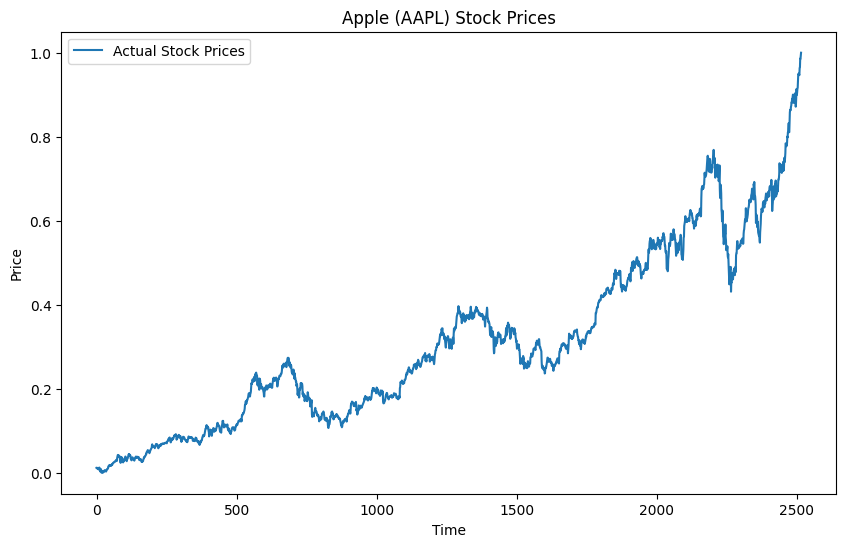

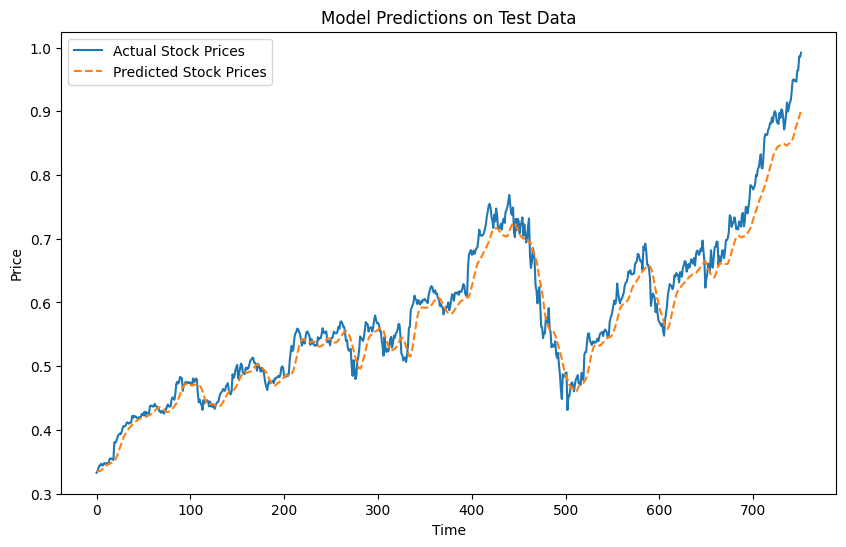

In [ ]:
import matplotlib.pyplot as plt

# Plot the original stock prices
plt.figure(figsize=(10, 6))
plt.plot(ts_data, label='Actual Stock Prices')
plt.title('Apple (AAPL) Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Plot the model's predictions on the test set
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Stock Prices')
plt.plot(predicted_values, label='Predicted Stock Prices', linestyle='--')
plt.title('Model Predictions on Test Data')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
X,y


(array([[0.01178427, 0.01198282, 0.01015293, ..., 0.0099812 , 0.00932653,
         0.00744834],
        [0.01198282, 0.01015293, 0.00994364, ..., 0.00932653, 0.00744834,
         0.01233699],
        [0.01015293, 0.00994364, 0.01069492, ..., 0.00744834, 0.01233699,
         0.01056077],
        ...,
        [0.91405418, 0.91664608, 0.93050711, ..., 0.94662198, 0.96375103,
         0.96476521],
        [0.91664608, 0.93050711, 0.94819959, ..., 0.96375103, 0.96476521,
         0.9859512 ],
        [0.93050711, 0.94819959, 0.95026566, ..., 0.96476521, 0.9859512 ,
         0.98553794]]),
 array([0.01233699, 0.01056077, 0.00859671, ..., 0.9859512 , 0.98553794,
        0.99199891]))

In [ ]:
X[0], y[0]

(array([0.01178427, 0.01198282, 0.01015293, 0.00994364, 0.01069492,
        0.00969144, 0.00840889, 0.0099812 , 0.00932653, 0.00744834]),
 0.012336989278101604)

In [ ]:
ts_data

array([[0.01178427],
       [0.01198282],
       [0.01015293],
       ...,
       [0.98553794],
       [0.99199891],
       [1.        ]])

#Experiement

In [ ]:
import numpy as np

In [ ]:
# Prepare the time series data for training
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])  # Window (history) creation
        y.append(data[i + time_steps, 0])  # Horizon (prediction)
    return np.array(X), np.array(y)


In [ ]:
data2=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

In [ ]:
np_data2=np.array(data2)

In [ ]:
np_data2

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [ ]:
np_data2.shape

(15,)

In [ ]:
np_data2.ndim

1

In [ ]:
np_data2[1,0]

IndexError: ignored

In [ ]:
np_data2a=np_data2.reshape(15, 1)
np_data2a

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15]])

In [ ]:
np_data2a.shape

(15, 1)

In [ ]:
np_data2a[1,0]

2

In [ ]:
# Normalize the time series data
#scaler = MinMaxScaler(feature_range=(0, 1))
#ts_data2a = scaler.fit_transform(np_data2a)

In [ ]:
 ts_data2a= np_data2a
 Xa,ya= prepare_data(ts_data2a , 3)
 Xa,ya


(array([[ 1,  2,  3],
        [ 2,  3,  4],
        [ 3,  4,  5],
        [ 4,  5,  6],
        [ 5,  6,  7],
        [ 6,  7,  8],
        [ 7,  8,  9],
        [ 8,  9, 10],
        [ 9, 10, 11],
        [10, 11, 12],
        [11, 12, 13]]),
 array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]))

In [ ]:
# Prepare the time series data for training
def prepare_data(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps - 1):
        X.append(data[i:(i + time_steps), 0])  # Window (history) creation
        y.append(data[i + time_steps, 0])  # Horizon (prediction)
    return np.array(X), np.array(y)


In [ ]:
data3=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
X, y = [],[]
steps=3
window=1
for i in range(len(data3)-steps-window+1):
  X.append(data3[i:i+steps])
  y.append(data3[i+steps:i+steps+1])
  #print(i)










[[1, 2, 3],
 [2, 3, 4],
 [3, 4, 5],
 [4, 5, 6],
 [5, 6, 7],
 [6, 7, 8],
 [7, 8, 9],
 [8, 9, 10],
 [9, 10, 11],
 [10, 11, 12],
 [11, 12, 13],
 [12, 13, 14],
 [13, 14, 15]]

In [ ]:
X[0]

[1, 2, 3]

In [ ]:
np_X=np.array(X)
np_X

array([[ 1,  2,  3],
       [ 2,  3,  4],
       [ 3,  4,  5],
       [ 4,  5,  6],
       [ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10],
       [ 9, 10, 11],
       [10, 11, 12],
       [11, 12, 13],
       [12, 13, 14],
       [13, 14, 15]])

In [ ]:
y


[[4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16]]

In [ ]:
np.array(y)

array([[ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [ ]:
data3=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16]
X, y = [],[]


def timeline_data(data, window, horizon):
  X, y = [],[]
  for i in range(len(data)-window-horizon+1):
    X.append(data[i:i+window])
    y.append(data[i+window:i+window+1])


  np_X=np.array(X)
  np_y=np.array(y)
  return np_X,np_y


def timeline_data_np(data, window, horizon):
  X, y = [],[]
  data=data.tolist()
  for i in range(len(data)-window-horizon+1):
    X.append(data[i:i+window])
    y.append(data[i+window:i+window+1])



  np_X=np.array(X)
  np_y=np.array(y)
  return np_X,np_y


In [ ]:
timeline_data_np(np.array(data3),3,1)

(array([[ 1,  2,  3],
        [ 2,  3,  4],
        [ 3,  4,  5],
        [ 4,  5,  6],
        [ 5,  6,  7],
        [ 6,  7,  8],
        [ 7,  8,  9],
        [ 8,  9, 10],
        [ 9, 10, 11],
        [10, 11, 12],
        [11, 12, 13],
        [12, 13, 14],
        [13, 14, 15]]),
 array([[ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10],
        [11],
        [12],
        [13],
        [14],
        [15],
        [16]]))

In [ ]:
XX

array([], dtype=float64)

In [ ]:
yy

array([], dtype=float64)